In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


# import the requests library
import requests

# import the API key
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=12dc0e98aa28348d65497aae53a01a6f


In [28]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [1]:
# Get the nearest city using the citipy module
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

NameError: name 'coordinates' is not defined

In [31]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | yulara
Processing Record 4 of Set 1 | adrar
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | saleaula
City not found. Skipping...
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 13 of Set 1 | vestmannaeyjar
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | beasain
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 

Processing Record 38 of Set 4 | rawson
Processing Record 39 of Set 4 | lebu
Processing Record 40 of Set 4 | kuche
City not found. Skipping...
Processing Record 41 of Set 4 | avera
Processing Record 42 of Set 4 | brae
Processing Record 43 of Set 4 | belyy yar
Processing Record 44 of Set 4 | beecher
Processing Record 45 of Set 4 | ponta do sol
Processing Record 46 of Set 4 | ionia
Processing Record 47 of Set 4 | sinnamary
Processing Record 48 of Set 4 | hihifo
City not found. Skipping...
Processing Record 49 of Set 4 | merauke
Processing Record 50 of Set 4 | bad berleburg
Processing Record 1 of Set 5 | saint-augustin
Processing Record 2 of Set 5 | am timan
Processing Record 3 of Set 5 | isangel
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 5 | san quintin
Processing Record 7 of Set 5 | cachira
Processing Record 8 of Set 5 | santa eulalia
Processing Record 9 of Set 5 | kungurtug
Processing Record 10 of Se

Processing Record 30 of Set 8 | kokopo
Processing Record 31 of Set 8 | mehamn
Processing Record 32 of Set 8 | sibenik
Processing Record 33 of Set 8 | mukhen
Processing Record 34 of Set 8 | toliary
City not found. Skipping...
Processing Record 35 of Set 8 | camacha
Processing Record 36 of Set 8 | batemans bay
Processing Record 37 of Set 8 | sitka
Processing Record 38 of Set 8 | carutapera
Processing Record 39 of Set 8 | laiagam
City not found. Skipping...
Processing Record 40 of Set 8 | kreminna
Processing Record 41 of Set 8 | maragogi
Processing Record 42 of Set 8 | sindou
Processing Record 43 of Set 8 | berlevag
Processing Record 44 of Set 8 | mamallapuram
Processing Record 45 of Set 8 | rabaul
Processing Record 46 of Set 8 | quepos
Processing Record 47 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 48 of Set 8 | easton
Processing Record 49 of Set 8 | mendi
Processing Record 50 of Set 8 | payo
Processing Record 1 of Set 9 | stoyba
City not found. Skipping...
Process

Processing Record 16 of Set 12 | kalanguy
Processing Record 17 of Set 12 | hamilton
Processing Record 18 of Set 12 | saint anthony
Processing Record 19 of Set 12 | beringovskiy
Processing Record 20 of Set 12 | pochutla
Processing Record 21 of Set 12 | amapa
Processing Record 22 of Set 12 | tabat
Processing Record 23 of Set 12 | kysyl-syr
Processing Record 24 of Set 12 | oriximina
Processing Record 25 of Set 12 | dzhebariki-khaya
Processing Record 26 of Set 12 | lakhimpur
Processing Record 27 of Set 12 | tofield
Processing Record 28 of Set 12 | bud
Processing Record 29 of Set 12 | george town
Processing Record 30 of Set 12 | mbamba
Processing Record 31 of Set 12 | saint-francois
Processing Record 32 of Set 12 | lorengau
Processing Record 33 of Set 12 | mecca
Processing Record 34 of Set 12 | dianopolis
City not found. Skipping...
Processing Record 35 of Set 12 | taoudenni
Processing Record 36 of Set 12 | dukat
Processing Record 37 of Set 12 | san vicente
Processing Record 38 of Set 12 | 

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,-35.09,100,74,3.62,RU,2022-01-26 03:48:55
1,Avarua,-21.2078,-159.7750,80.65,83,75,8.05,CK,2022-01-26 03:48:56
2,Yulara,-25.2406,130.9889,96.64,32,100,10.36,AU,2022-01-26 03:48:56
3,Adrar,20.5022,-10.0711,63.18,18,100,4.21,MR,2022-01-26 03:48:57
4,East London,-33.0153,27.9116,70.74,94,75,3.44,ZA,2022-01-26 03:48:57
5,Kavieng,-2.5744,150.7967,84.20,73,92,7.11,PG,2022-01-26 03:48:57
6,Punta Arenas,-53.1500,-70.9167,46.51,61,0,24.16,CL,2022-01-26 03:48:58
7,Cape Town,-33.9258,18.4232,66.61,83,0,5.99,ZA,2022-01-26 03:48:58
8,Provideniya,64.3833,-173.3000,-8.64,64,100,4.47,RU,2022-01-26 03:48:59
9,Vestmannaeyjar,63.4427,-20.2734,35.91,64,100,4.94,IS,2022-01-26 03:49:00


In [36]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [37]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2022-01-26 03:48:55,69.7008,170.3133,-35.09,100,74,3.62
1,Avarua,CK,2022-01-26 03:48:56,-21.2078,-159.7750,80.65,83,75,8.05
2,Yulara,AU,2022-01-26 03:48:56,-25.2406,130.9889,96.64,32,100,10.36
3,Adrar,MR,2022-01-26 03:48:57,20.5022,-10.0711,63.18,18,100,4.21
4,East London,ZA,2022-01-26 03:48:57,-33.0153,27.9116,70.74,94,75,3.44
5,Kavieng,PG,2022-01-26 03:48:57,-2.5744,150.7967,84.20,73,92,7.11
6,Punta Arenas,CL,2022-01-26 03:48:58,-53.1500,-70.9167,46.51,61,0,24.16
7,Cape Town,ZA,2022-01-26 03:48:58,-33.9258,18.4232,66.61,83,0,5.99
8,Provideniya,RU,2022-01-26 03:48:59,64.3833,-173.3000,-8.64,64,100,4.47
9,Vestmannaeyjar,IS,2022-01-26 03:49:00,63.4427,-20.2734,35.91,64,100,4.94


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

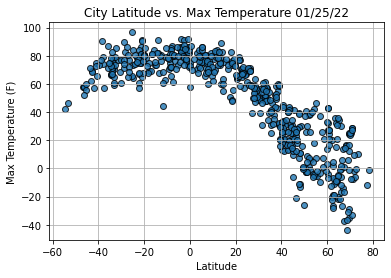

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title("City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

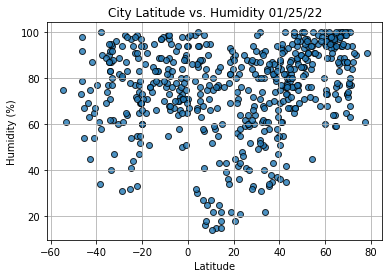

In [60]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

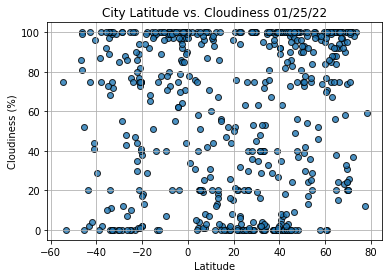

In [58]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

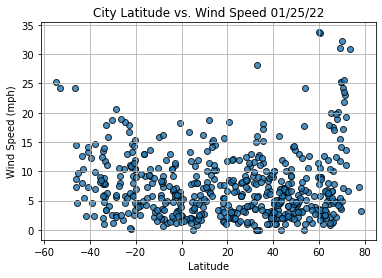

In [59]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2022-01-26 03:48:55,69.7008,170.3133,-35.09,100,74,3.62
3,Adrar,MR,2022-01-26 03:48:57,20.5022,-10.0711,63.18,18,100,4.21
8,Provideniya,RU,2022-01-26 03:48:59,64.3833,-173.3000,-8.64,64,100,4.47
9,Vestmannaeyjar,IS,2022-01-26 03:49:00,63.4427,-20.2734,35.91,64,100,4.94
11,Victoria,HK,2022-01-26 03:44:01,22.2855,114.1577,70.25,82,100,3.00


In [65]:
# Create northern and Southern Hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

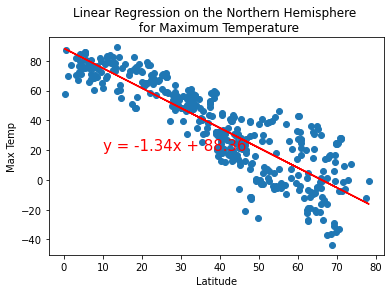

In [106]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,20))

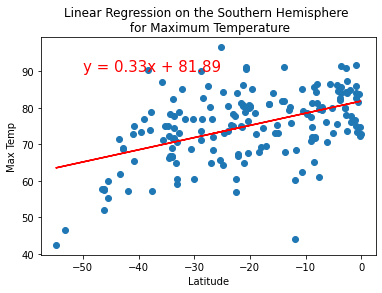

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 'Max Temp',(-50,90))

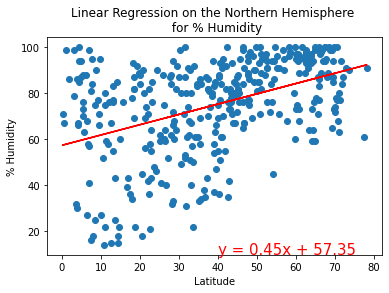

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity", '% Humidity',(40,10))

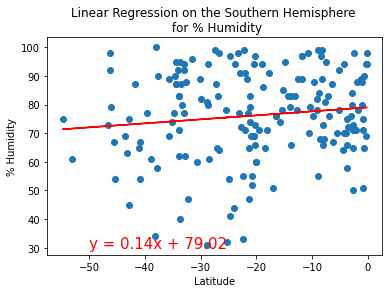

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity", '% Humidity',(-50,30))

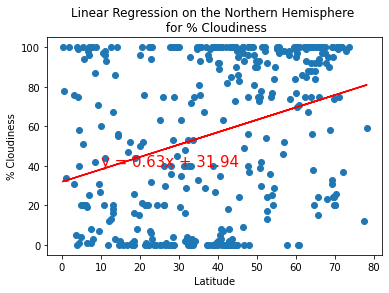

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Cloudiness", '% Cloudiness', (10, 40))

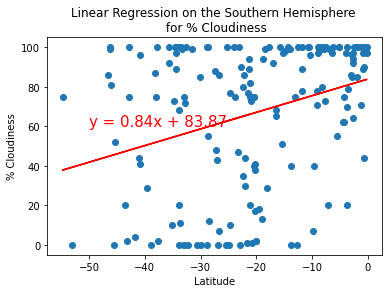

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

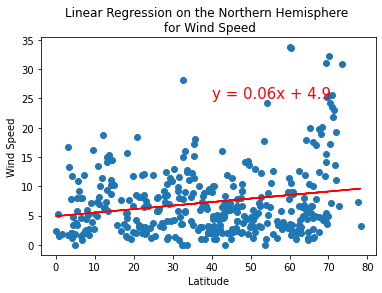

In [107]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Wind Speed", 'Wind Speed', (40,25))

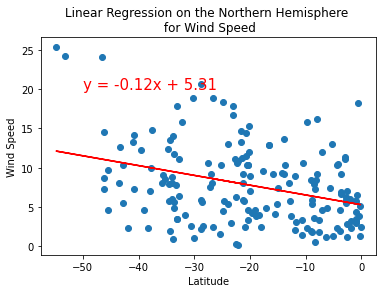

In [109]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Wind Speed", 'Wind Speed', (-50,20))